<a href="https://colab.research.google.com/github/mikelwp/Facial-Emotion-Recognition-CNN/blob/main/Facial_Emotion_Recognition_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## 2. Load and Prepare Data

In [ ]:
def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    all_entries = os.listdir(directory_path)
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]
    return folders

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

DIRECTORY = r"/content/drive/MyDrive/DATASET/train"
CATEGORIES = []

try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATEGORIES.append(folder)
    print(f"Categories found: {CATEGORIES}")
except ValueError as e:
    print(e)

Mounted at /content/drive
Directories in '/content/drive/MyDrive/DATASET/train':
Categories found: ['1', '6', '7', '5', '4', '2', '3']


In [ ]:
# Load training data
data = []

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY, categories)
    label = CATEGORIES.index(categories)

    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img_path}")

print(f"Training images loaded: {len(data)}")

Training images loaded: 12271


In [ ]:
# Load test data
DIRECTORY_TEST = r"/content/drive/MyDrive/DATASET/test"

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY_TEST, categories)
    label = CATEGORIES.index(categories)

    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img_path}")

print(f"Total images (train + test): {len(data)}")

Total images (train + test): 15339


In [ ]:
# Shuffle and split data
random.shuffle(data)

x = []
y = []

for features, label in data:
    x.append(features)
    y.append(label)

X = np.array(x, dtype='float32')
Y = np.array(y)

# Normalize
X = X / 255.0

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"Number of classes: {len(CATEGORIES)}")

X shape: (15339, 100, 100, 3)
Y shape: (15339,)
Number of classes: 7


In [ ]:
# Split data into training (75%) and validation (25%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (11504, 100, 100, 3)
Validation set: (3835, 100, 100, 3)


## 3. Build Optimized Model

In [ ]:
# Optimized model architecture dengan lebih banyak layers dan regularization
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Dense layers
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(len(CATEGORIES), activation='softmax'))

# Compile dengan optimizer yang lebih baik
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 25, 25, 256)    │             

 Total params: 20,160,071 (76.90 MB)

 Trainable params: 20,156,743 (76.89 MB)

 Non-trainable params: 3,328 (13.00 KB)

## 4. Data Augmentation

In [ ]:
# Data augmentation untuk meningkatkan generalisasi
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

print("Data augmentation configured")

Data augmentation configured


## 5. Callbacks

In [ ]:
# Callbacks untuk optimal training
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/fer_best.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    min_delta=0.001,
    patience=25,
    verbose=1,
    restore_best_weights=True
)

# Learning rate scheduler untuk adaptif learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

callbacks = [checkpoint, earlystop, reduce_lr]
print("Callbacks configured")

Callbacks configured


## 6. Train Model

In [ ]:
# Training dengan data augmentation dan proper validation data
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=100,
    validation_data=(X_val, Y_val),
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3004 - loss: 2.0542
Epoch 1: val_accuracy improved from -inf to 0.38774, saving model to /content/drive/MyDrive/fer_best.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 3282s 9s/step - accuracy: 0.3005 - loss: 2.0537 - val_accuracy: 0.3877 - val_loss: 1.7858 - learning_rate: 0.0010
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3695 - loss: 1.6954
Epoch 2: val_accuracy improved from 0.38774 to 0.40782, saving model to /content/drive/MyDrive/fer_best.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 3243s 9s/step - accuracy: 0.3695 - loss: 1.6953 - val_accuracy: 0.4078 - val_loss: 1.5518 - learning_rate: 0.0010
Epoch 3/100
179/360 ━━━━━━━━━━━━━━━━━━━━ 25:03 8s/step - accuracy: 0.3942 - loss: 1.6283

KeyboardInterrupt: 

## 7. Evaluate Model

In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

NameError: name 'model' is not defined

## 8. Plot Training History

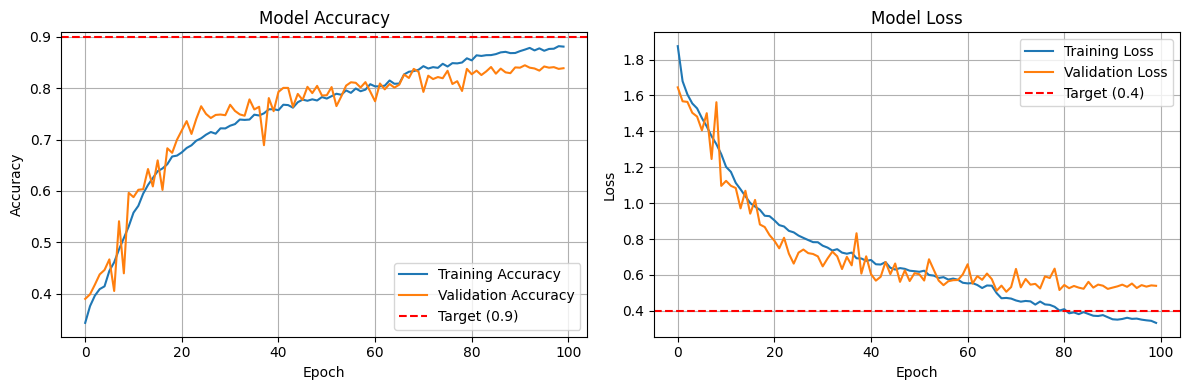

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=0.9, color='r', linestyle='--', label='Target (0.9)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=0.4, color='r', linestyle='--', label='Target (0.4)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 9. Save Model

In [ ]:
# Save final model
model.save('/content/drive/MyDrive/modelcnn_optimized.keras')
model.save('/content/drive/MyDrive/modelcnn_optimized.h5')
print("Model saved to Google Drive!")

## 10. Prediction

In [ ]:
from keras.preprocessing import image

# Load dan predict single image
img_pred = image.load_img(r"/content/drive/MyDrive/DATASET/test/[emotion_class]/test_image.jpg", target_size=(100, 100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

result = model.predict(img_pred)
predicted_emotion = CATEGORIES[np.argmax(result)]
confidence = np.max(result)

print(f"Predicted Emotion: {predicted_emotion}")
print(f"Confidence: {confidence:.4f}")
print(f"All predictions: {result}")

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

print("\n=== Evaluating on TEST SET ===")

# Load test data again (separately)
X_test = []
Y_test = []

DIRECTORY_TEST = r"/content/drive/MyDrive/DATASET/test"

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY_TEST, category)
    label = CATEGORIES.index(category)

    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)

        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (100, 100))
            X_test.append(img_arr)
            Y_test.append(label)

X_test = np.array(X_test, dtype="float32") / 255.0
Y_test = np.array(Y_test)

print("Total test images:", len(X_test))

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# ============================================
# Confusion Matrix
# ============================================
cm = confusion_matrix(Y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ============================================
# Classification Report (Accuracy, Precision, Recall, F1)
# ============================================
report = classification_report(Y_test, y_pred_classes, target_names=CATEGORIES, output_dict=True)

df_report = pd.DataFrame(report).transpose()
print("\n=== Classification Report ===")
print(df_report)

# Menampilkan tabel rapi
df_report_style = df_report.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]},
     {'selector': 'td', 'props': [('font-size', '12pt')]}]
)

df_report


=== Evaluating on TEST SET ===


NameError: name 'CATEGORIES' is not defined